<a href="https://colab.research.google.com/github/Anna172/Python/blob/master/%D0%94%D0%B7%D0%90%D0%9F%D0%9D%D0%92%D0%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Power** **Spectrum**
Home task №1


Анна Трушникова ББИ172


# Описание данных

Источник:
https://www.federalreserve.gov/datadownload/Download.aspx?rel=H10&series=a3220d269bb3c9c5e2fffa49160c8cdf&filetype=csv&label=include&layout=seriescolumn&lastObs=10

Описание:
Я взяла данные по валютному курсу ДАНИИ (KRONER / US $) за последние 10 лет

Bilateral exchange rate data are updated every Monday at 4:15 p.m. Data are available up through Friday of the previous business week.

The following exchange rates are certified by the Federal Reserve Bank of New York for customs purposes as required by section 522 of the amended Tariff Act of 1930. These rates are also those required by the SEC for the integrated disclosure system for foreign private issuers. The information is based on data collected by the Federal Reserve Bank of New York from a sample of market participants.

The data are noon buying rates in New York for cable transfers payable in foreign currencies.



# Загрузка данных

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import math

flatui = ["#41b6c4", "#9ecae1", "#f768a1", "#c994c7", "#8c6bb1", "#41b6c4"]
sns.set(style='ticks', palette=sns.color_palette(flatui))

In [0]:
obs = pd.read_csv("FRB_H10.csv", parse_dates=['date'], na_values='ND')

In [60]:
obs.shape

(12263, 2)

In [61]:
obs.head()

,date,rate
0,1973-01-01,NaN
1,1973-01-02,6.8481
2,1973-01-03,6.8906
3,1973-01-04,6.9001
4,1973-01-05,6.9001


In [62]:
obs.dtypes

date    datetime64[ns]
rate           float64
dtype: object

In [63]:
#obs_new = obs.fillna(value=8.0)
obs_new = obs.dropna()
obs_new.shape

(11796, 2)

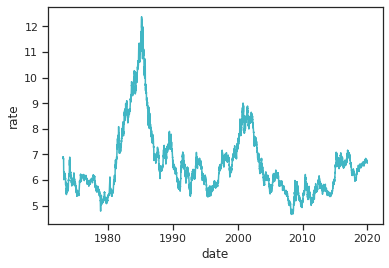

In [64]:
sns.lineplot(x='date', y='rate', data=obs_new);

In [0]:
fft_coef = np.fft.rfft(obs_new['rate'])

In [0]:
ps_coef = np.abs(fft_coef)**2

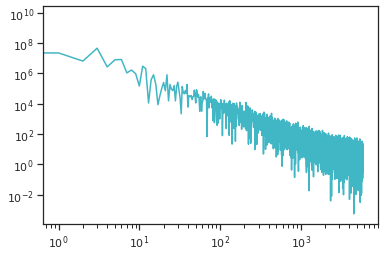

In [67]:
plt.loglog(ps_coef)

In [68]:
x = np.arange(1, 5900)
x_log = np.log(x).reshape(-1, 1)
y_log = np.log(ps_coef)
model = LinearRegression().fit(x_log, y_log)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
#y_pred = model.intercept_ + model.coef_ * x

intercept: 16.30446205495282
slope: [-1.77820285]


In [0]:
y_pred = model.predict(x_log)

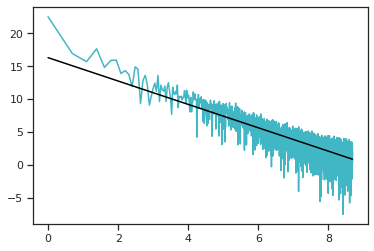

In [70]:

plt.plot(x_log, y_log)
plt.plot(x_log, y_pred, c='black')
plt.show()

In [0]:
Это розовый шум